In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
meteorites = pd.read_csv("Meteorite_Landings.csv")

In [3]:
meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM,-33.16667,-64.95000,"(-33.16667, -64.95)"


In [4]:
meteorites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  object 
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 3.5+ MB


Tenemos datos nulos sobre el año y la masa que hay que eliminar para poder realizar los cálculos

Por el momento no se requerira analizar los datos espaciales, así que se ignoraran las columnas por el momento

In [5]:
meteorites_drop = meteorites.drop(columns=['reclat', 'reclong', 'GeoLocation'])

In [6]:
meteorites_drop.dropna(axis=0, inplace=True)

Parece ser que aquellos meteoritos registrados como "encontrados" (con el valor "Fell" en la columna "fall"), tienen en su columna de "year" el anio en que fueron encontrados, no el anio o en que se estima cayeron a Tierra.

In [7]:
meteorites.loc[meteorites["fall"] == "Found"].sort_values("mass (g)", ascending=False).head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
16392,Hoba,11890,Valid,"Iron, IVB",60000000.0,Found,01/01/1920 12:00:00 AM,-19.58333,17.91667,"(-19.58333, 17.91667)"
5373,Cape York,5262,Valid,"Iron, IIIAB",58200000.0,Found,01/01/1818 12:00:00 AM,76.13333,-64.93333,"(76.13333, -64.93333)"
5365,Campo del Cielo,5247,Valid,"Iron, IAB-MG",50000000.0,Found,12/22/1575 12:00:00 AM,-27.46667,-60.58333,"(-27.46667, -60.58333)"
5370,Canyon Diablo,5257,Valid,"Iron, IAB-MG",30000000.0,Found,01/01/1891 12:00:00 AM,35.05000,-111.03333,"(35.05, -111.03333)"
3455,Armanty,2335,Valid,"Iron, IIIE",28000000.0,Found,01/01/1898 12:00:00 AM,47.00000,88.00000,"(47.0, 88.0)"


Entonces, para poder calcular el riesgo, tendremos que usar unicamente meteoritos registrados en la columna "fall" como "Fell", ya que en este caso coincide el anio de caida con el de registro.

In [8]:
meteorites.loc[meteorites["fall"] == "Fell"].values.shape[0]

1107

Muy pocos meteoritos estan registrados como "Fell", el resto de 44 mil meteoritos fueron encontrados unicamente

In [9]:
meteorites.loc[meteorites["name"] == "Agoudal"].head()

,name,id,nametype,recclass,mass (g),fall,year,reclat,reclong,GeoLocation
1538,Agoudal,57354,Valid,"Iron, IIAB",100000.0,Found,01/01/2000 12:00:00 AM,31.98457,-5.51528,"(31.98457, -5.51528)"


In [10]:
fallen_meteorites = meteorites_drop.loc[meteorites_drop["fall"] == "Fell"].copy()

In [11]:
fallen_meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year
0,Aachen,1,Valid,L5,21.0,Fell,01/01/1880 12:00:00 AM
1,Aarhus,2,Valid,H6,720.0,Fell,01/01/1951 12:00:00 AM
2,Abee,6,Valid,EH4,107000.0,Fell,01/01/1952 12:00:00 AM
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,01/01/1976 12:00:00 AM
4,Achiras,370,Valid,L6,780.0,Fell,01/01/1902 12:00:00 AM


In [12]:
fallen_meteorites.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1075 entries, 0 to 1110
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      1075 non-null   object 
 1   id        1075 non-null   int64  
 2   nametype  1075 non-null   object 
 3   recclass  1075 non-null   object 
 4   mass (g)  1075 non-null   float64
 5   fall      1075 non-null   object 
 6   year      1075 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 67.2+ KB


In [13]:
fallen_meteorites['year'] = fallen_meteorites['year'].apply(lambda x: int(x[6:10]))

In [14]:
fallen_meteorites.head()

,name,id,nametype,recclass,mass (g),fall,year
0,Aachen,1,Valid,L5,21.0,Fell,1880
1,Aarhus,2,Valid,H6,720.0,Fell,1951
2,Abee,6,Valid,EH4,107000.0,Fell,1952
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976
4,Achiras,370,Valid,L6,780.0,Fell,1902


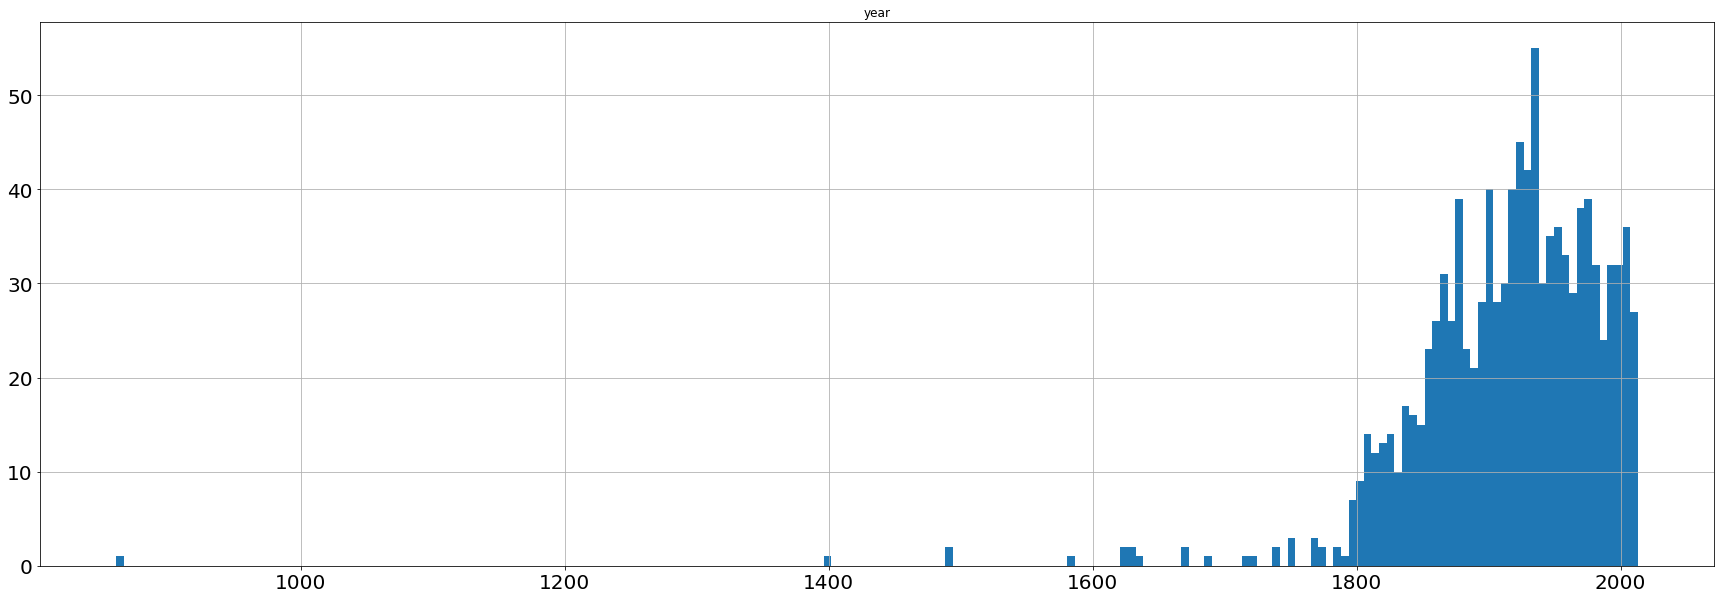

In [15]:
fallen_meteorites.hist(column=['year'], xlabelsize=20, ylabelsize=20, figsize=(30,10), bins=200)

plt.show()

Notese que la cantidad de avistamientos de caidas de meteoritos fue en aumento desde el primer registro hasta el siglo XX. Se requiere una distribución uniforme para poder estimar la probabilidad por año confiablemente dado que se subestimaría usando todo el conjunto. A partir de 1860 se vuelve uniforme la distribución.

In [37]:
start_year = 1850

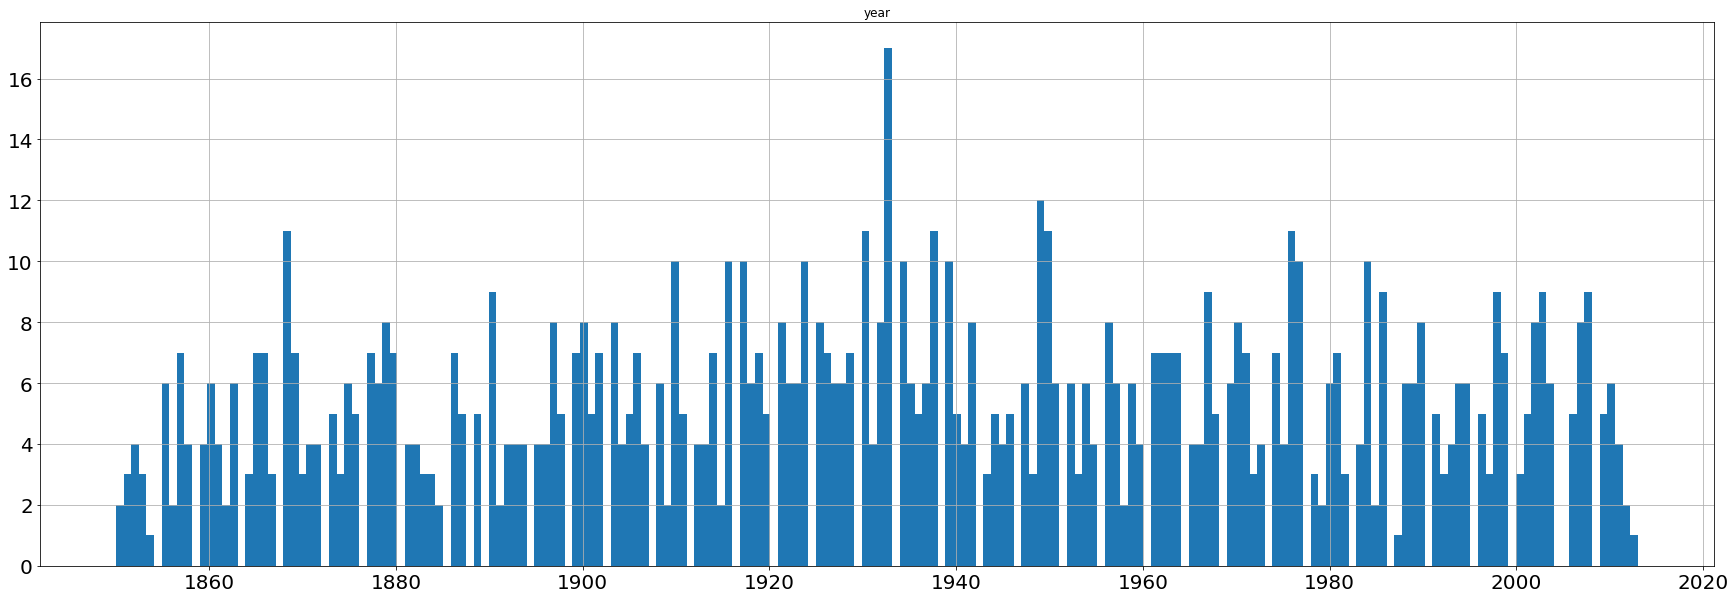

In [38]:
fallen_subset = fallen_meteorites.loc[fallen_meteorites['year'] >= start_year].copy()
fallen_subset.hist(column=['year'], xlabelsize=20, ylabelsize=20, figsize=(30,10), bins=200)

plt.show()

In [39]:
max_year = fallen_subset['year'].max(axis=0)

In [40]:
max_year

2013

In [41]:
num_years = (max_year - start_year)+1 # Para incluir los extremos

In [42]:
num_years

164

In [43]:
def cdf_uniform(x, a, b):
    return (x-a)/(b-a+1)

In [44]:
fallen_subset.values.shape[0]

925

In [45]:
error = 0
for i in range(num_years):
    target = cdf_uniform(start_year+i, start_year, 2013)
    prob = (fallen_subset.loc[fallen_subset['year'] <= (start_year+i)]).values.shape[0]/fallen_subset.values.shape[0]
    #print(target, prob)
    error += abs(target - prob)
    
error /= num_years

In [46]:
error

0.021406739874913594

In [26]:
fallen_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 1110
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      925 non-null    object 
 1   id        925 non-null    int64  
 2   nametype  925 non-null    object 
 3   recclass  925 non-null    object 
 4   mass (g)  925 non-null    float64
 5   fall      925 non-null    object 
 6   year      925 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 57.8+ KB


Solo se redujo la cantidad de datos por 150 instancias

Debido a que la distribucion de los meteoritos por su masa y cantidad es de tipo exponencial, al decaer muy rapidamente la cantidad de meteoritos en cuanto mayor masa se trate, el histograma debe tener bins distribuidos logaritmicamente y no linealmente como se calculan por defecto para no quedar acumulados todos en un mismo bin

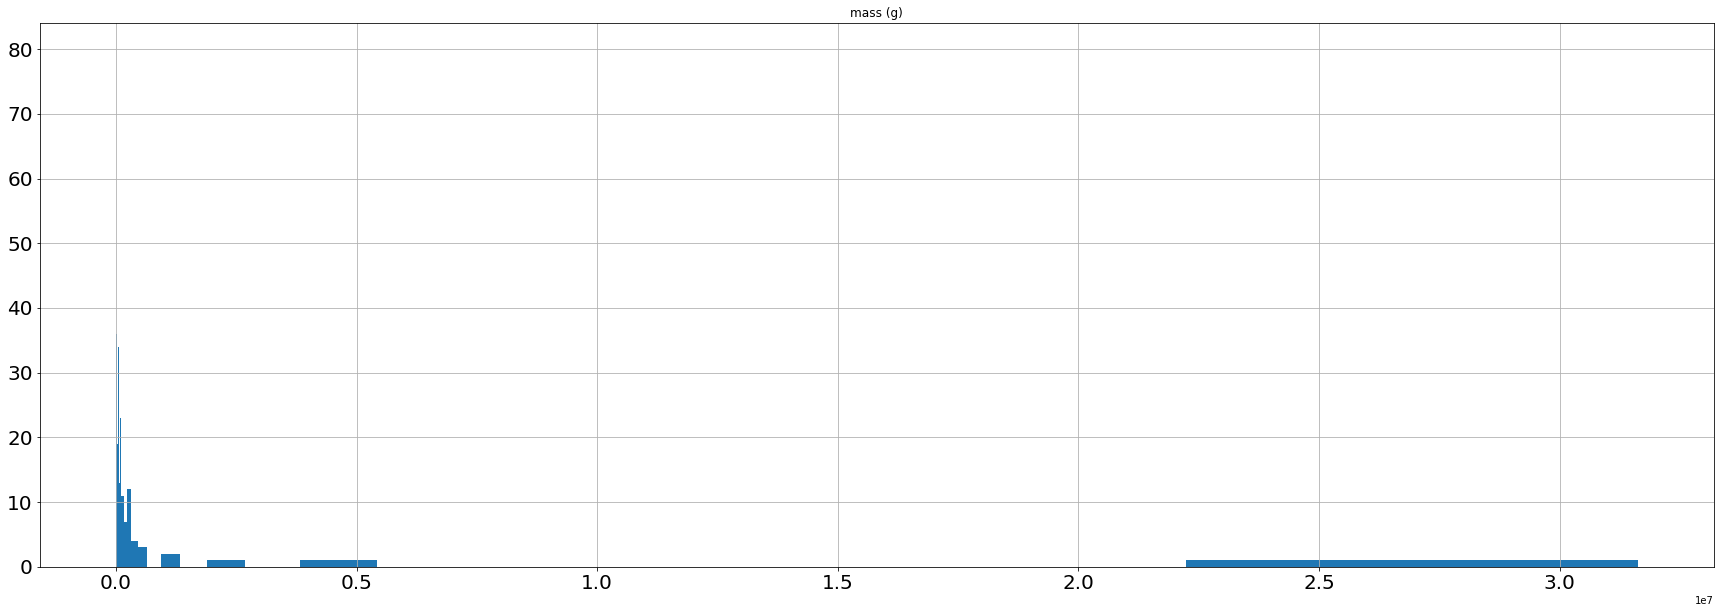

In [19]:
logbins = np.logspace(0, 7.5, 50)
fallen_subset.hist(column=['mass (g)'], xlabelsize=20, ylabelsize=20, figsize=(30,10), bins=logbins)
plt.show()

Sin embargo, aún no se aprecia la distribución

In [20]:
(fallen_subset['mass (g)'] < 1).sum()

4

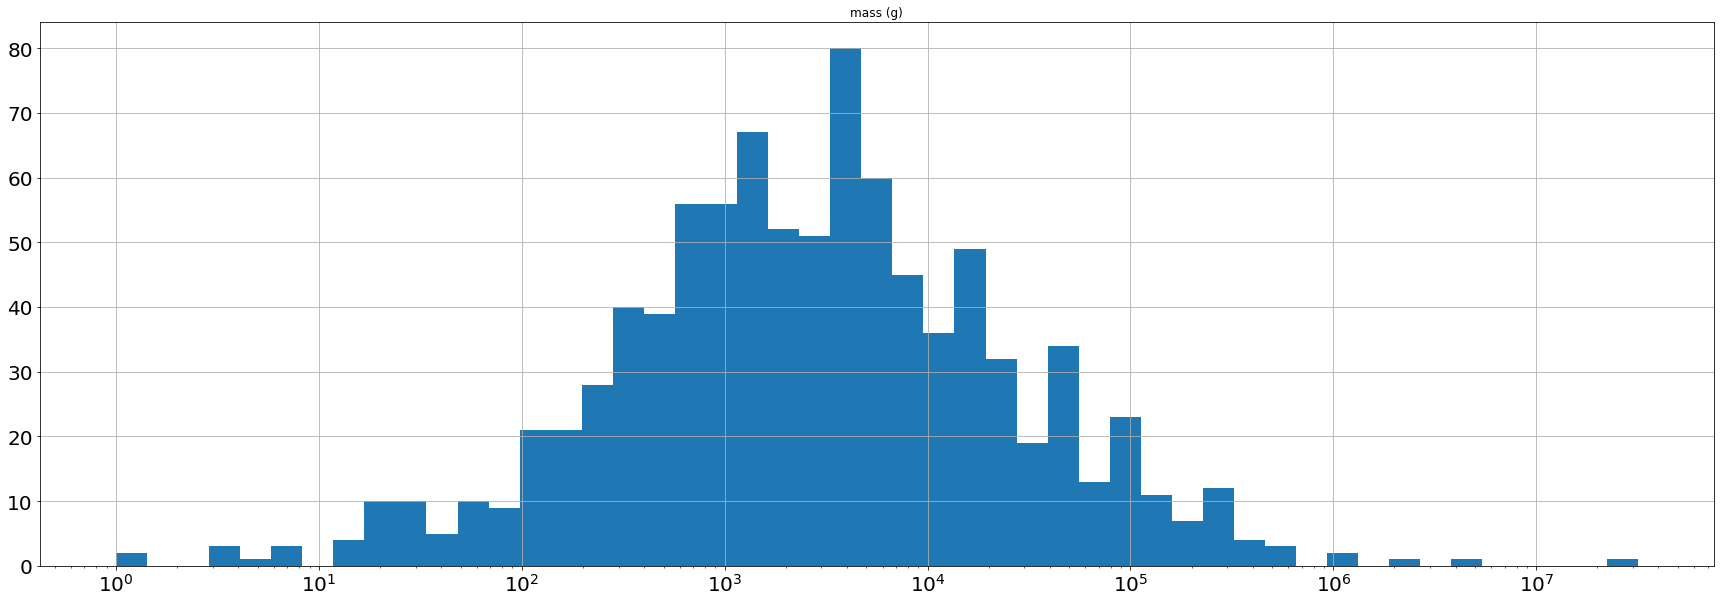

In [21]:
logbins = np.logspace(0, 7.5, 50) # El inicio y fin que deben especificarse para esta funcion delimitan el rango de potencias a la cual se elevara la base, 10, para producir los valores dentro del intervalo
# Es como un linspace, pero sobre las potencias aplicadas
fallen_subset.hist(column=['mass (g)'], xlabelsize=20, ylabelsize=20, figsize=(30,10), bins=logbins)
plt.xscale('log')
plt.show()

Como puede apreciarse, la distribución normal de los datos toma forma cuando se aplica la escala logarítmica a ellos. De otro modo, la distribución es casi imperceptible.

Ahora aplicaremos estos cambios a los datos

In [22]:
fallen_subset['masas'] = fallen_subset['mass (g)'].apply(lambda x: np.log10(x))

In [23]:
masas = fallen_subset['masas'].values

In [24]:
(masas < 0).sum()

4

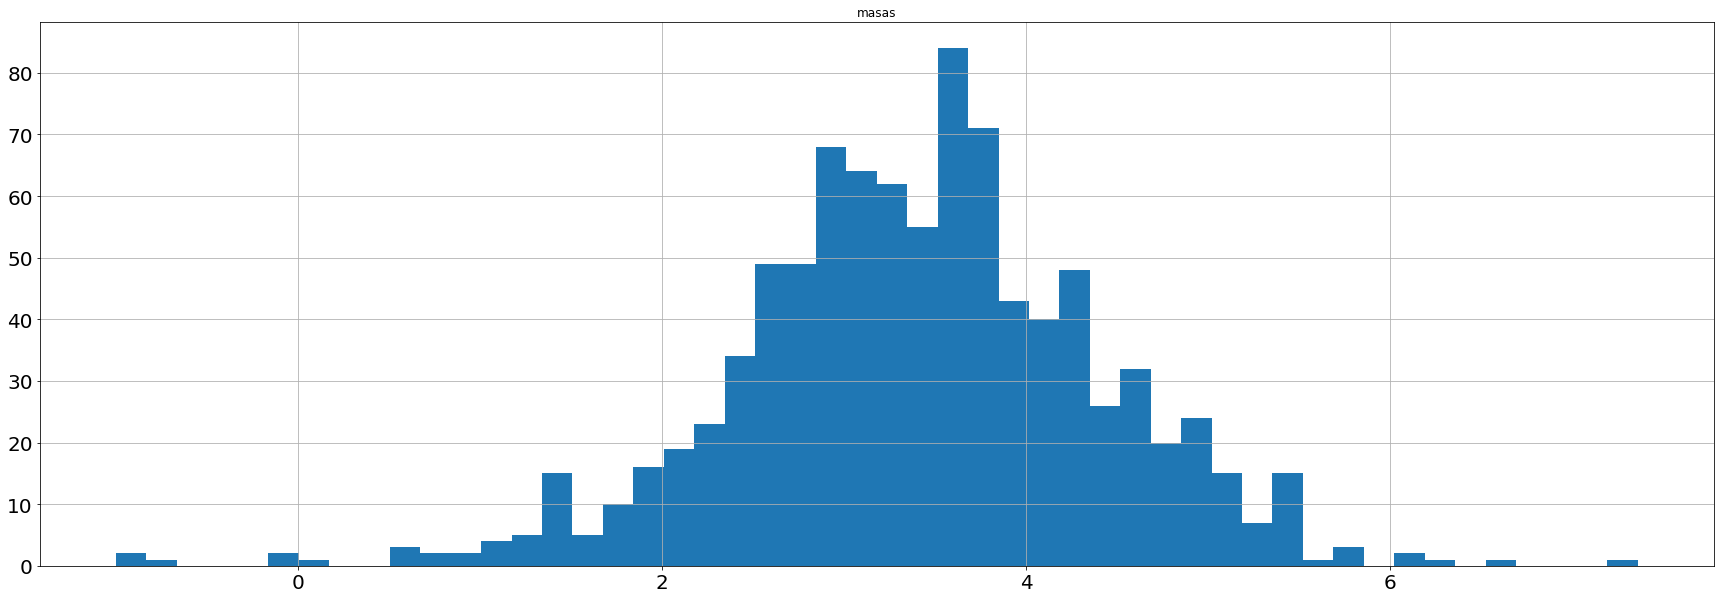

In [25]:
fallen_subset.hist(column=['masas'], xlabelsize=20, ylabelsize=20, figsize=(30,10), bins=50)
#plt.xscale('log')
plt.show()

Resulta un tanto distinta la distribucion, como por la presencia de datos negativos. Pero ahora se aprecia aún más similar a una distribución normal

In [26]:
kilos = 1000 # Parametro en kilogramos que puede cambiarse para examinar la probabilidad para cierta masa de meteorito

stdev = np.sqrt(np.var(masas))
mean = np.mean(masas)
target = np.log10(kilos * 1000.0) # kilogramos a gramos y luego logaritmo base 10

In [27]:
target

6.0

In [28]:
print(mean)
print(stdev)

3.4092657104704487
1.0073075663631443


Probabilidad de que obtener un meteorito mayor o igual a 1000 kg, o 1 tonelada

In [29]:
prob_mayor = 1.0 - norm.cdf(target, loc=mean, scale=stdev)
prob_mayor

0.00505652565695347

Esta es la probabilidad de que dado un meterito arbitrario, este sea de masa mayor o igual a 1 tonelada

Entonces lo que falta calcular es la probabilidad de que ocurra 1 meteorito (independiente de masa) en 1 anyo

Se tienen 5.7 meteoritos cada anyo. Es decir que hay 5.7 oportunidades al anyo para obtener un meteorito de cierta masa

In [30]:
num_meteorites_year = fallen_subset['year'].value_counts()

In [31]:
mean_meteorites = num_meteorites_year.mean()
mean_meteorites

5.709876543209877

Podemos demostrar que la distribucion es uniforme para este intervalo de 1850 a 2013. Para una distribución uniforme, la funcion de densidad cumulativa esta dada por (x-a)/(b-a) para un intervalo de a a b (P(x<=a)). Entonces hay que ver que tanto se asemeja (x-1850)/(2013-1850) = (x-1850)/(163)

Esto significa que en promedio solo nos equivocamos por un 2.14% cada anyo, un porcentaje bastante pequenyo

Una vez demostrado esto, podemos asumir que la probabilidad distribucion se mantendra igual independientemente del interervalo de tiempo, como el de 1 anyo

Esto nos afirma que la probabilidad de que caiga un meteorido de 1 tonelada en 1 anyo es de 0.5%

In [40]:
def calc_prob_masa(data, kilos):
    # data debe provenir de un conjunto de impactos de meteorito uniformente distribuido en el interevalo de tiempo

    stdev = np.sqrt(np.var(masas))
    mean = np.mean(masas)
    target = np.log10(kilos * 1000.0) # kilogramos a gramos y luego logaritmo base 10
    print(target)
    return 1.0 - norm.cdf(target, loc=mean, scale=stdev)

In [41]:
def calc_riesgo(prob_masa, num_meteorites_year, anyos):
    
    prob_no_anyo = (1 - prob_masa)**num_meteorites_year # Prob de que se de un meteorito de dicha masa en 1 anyo

    prob_no_impacto_anyos = prob_no_anyo**anyos # Probabilidad de no impacto por anyos
    
    return 1 - prob_no_impacto_anyos # Probabilidad de por lo menos 1 impacto en anyos

In [51]:
prob = calc_prob_masa(masas, 1000)
riesgo = calc_riesgo(prob, 6, 10) # Redondeando a 6 meteoritos por anyo

6.0


In [52]:
prob

0.00505652565695347

In [53]:
riesgo

0.2622580586990332

O sea que el riesgo o probabilidad del impacto de 1 meteorito de 1 tonelada o más por los proximos 10 anyos es del 26.22%

Sin embargo, y si se experimenta con meteritos de mayor masa, se obtienen probabilidades demasiado bajas en compapracion a lo estimado en el marco de este topico. A pesar de que la descripcion del conjunto no especifica a detalle a que se refiere la variable de masa (g) dado que esta podria referirse a la masa estimada para el objeto astronomico o la masa posterior del objeto que impacto con la superficie tras perder masa en su trayecto a traves de la atmosfera